In [146]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from model import Model
%matplotlib inline

Image to work on and mask 

In [147]:
image = cv2.imread('test2.png',0)
mask = cv2.imread('mask.jpg',0)
model = Model()
model.load("./model.h5")

Save sizes

In [148]:
e1 = cv2.getTickCount()
rows,cols = mask.shape
roi = image[0:rows, 0:cols ]
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)

0.000229799


Resize image and blur it.

0.00457349


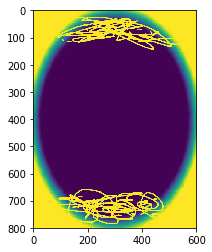

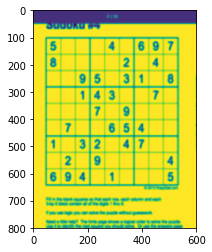

In [149]:
e1 = cv2.getTickCount()
image = cv2.resize(image, (600, 800)) 
blurred = cv2.GaussianBlur(image,(17,17),0)
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)
plt.figure()
plt.imshow(mask)
plt.figure()
plt.imshow(blurred)
plt.show()

Create binary mask

0.000621942


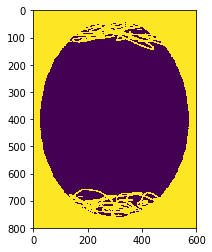

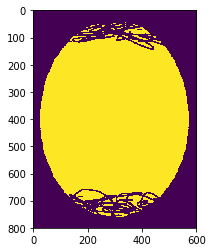

In [150]:
e1 = cv2.getTickCount()
ret, mask = cv2.threshold(mask, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)
plt.figure()
plt.imshow(mask)
plt.figure()
plt.imshow(mask_inv)

Create binary image

0.005871542


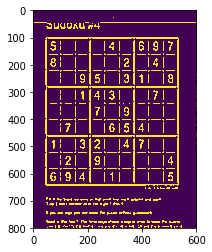

In [151]:
e1 = cv2.getTickCount()
bin_image = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,15,7)
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)
plt.figure()
plt.imshow(bin_image)

Add mask to picture

0.000826249


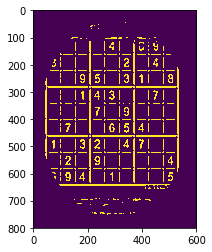

In [152]:
e1 = cv2.getTickCount()
with_mask = cv2.subtract(bin_image,mask)
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)
plt.figure()
plt.imshow(with_mask)

Delete noises

0.000791542


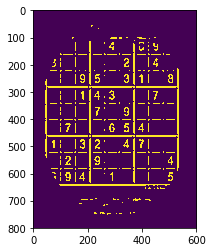

In [153]:
e1 = cv2.getTickCount()
kernel = np.ones((3,3),np.uint8)
noises_red = cv2.morphologyEx(with_mask, cv2.MORPH_OPEN, kernel)
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)
plt.figure()
plt.imshow(noises_red)

Add white areas

0.000862142


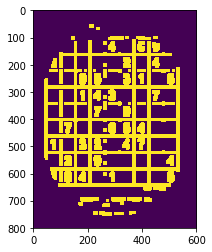

In [154]:
e1 = cv2.getTickCount()
kernel = np.ones((10,10),np.uint8)
dilation = cv2.dilate(noises_red,kernel)
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)
plt.figure()
plt.imshow(dilation)


Find contours and save biggest

In [155]:
e1 = cv2.getTickCount()
ind, contours, hierarchy = cv2.findContours(dilation,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
c_max = max(contours, key=cv2.contourArea)
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)

0.001726267


Draw contour you have found

[[ 41 662]
 [ 41  95]
 [537  95]
 [537 662]]
0.001783602


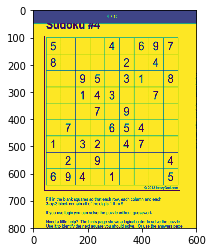

In [156]:
e1 = cv2.getTickCount()
rect = cv2.minAreaRect(c_max)
box = cv2.boxPoints(rect)
box = np.int0(box)
print(box)
cv2.drawContours(image,[box],0,(0,0,255),2)
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)
plt.figure()
plt.imshow(image)

Get not tilted sudoku

0.001860274


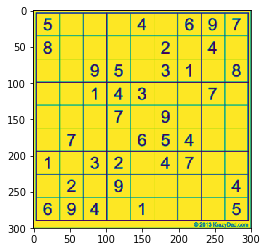

In [157]:
def sortV(vert):
    vert = sorted(vert, key=lambda v : v[1])
    if vert[0][0] > vert[1][0]:
        swaper = vert[0]
        vert[0] = vert[1]
        vert[1] = swaper
    if vert[3][0] > vert[2][0]:
        swaper = vert[2]
        vert[2] = vert[3]
        vert[3] = swaper
    return vert

e1 = cv2.getTickCount()
res_size = np.float32([[0,0],[300,0],[300,300],[0,300]])
box = sortV(box)
M = cv2.getPerspectiveTransform(np.float32(box),res_size)
sudoku = cv2.warpPerspective(image,M,(300,300))
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)

plt.figure()
plt.imshow(sudoku)


Blur sudoku(not used now) and create grid mask

0.001637752


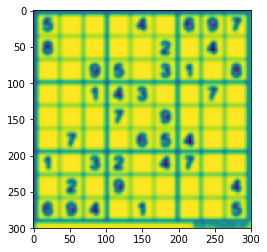

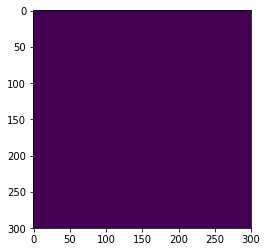

In [158]:
e1 = cv2.getTickCount()
blurred = cv2.GaussianBlur(sudoku,(15,15),0)
e2 = cv2.getTickCount()
grid_mask = np.zeros( (300,300),np.uint8)
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)
plt.figure()
plt.imshow(blurred)
plt.figure()
plt.imshow(grid_mask)

Get binary image

0.002268827


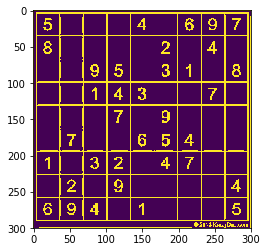

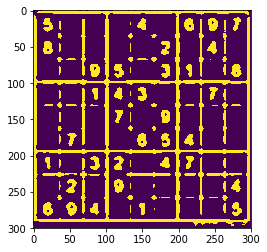

In [159]:
e1 = cv2.getTickCount()
bin_image_with_blurr = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,21,7)
bin_image_no_blurr = cv2.adaptiveThreshold(sudoku,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,21,7)
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)
plt.figure()
plt.imshow(bin_image_no_blurr)
plt.figure()
plt.imshow(bin_image_with_blurr)

Fight noiseses

0.000557113


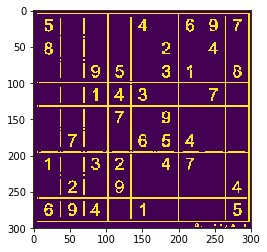

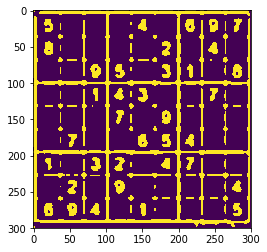

In [160]:
e1 = cv2.getTickCount()
kernel = np.ones((2,2),np.uint8)
noises_red_no = cv2.morphologyEx(bin_image_no_blurr, cv2.MORPH_OPEN, kernel)
noises_red_with = cv2.morphologyEx(bin_image_with_blurr, cv2.MORPH_OPEN, kernel)
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)
plt.figure()
plt.imshow(noises_red_no)
plt.figure()
plt.imshow(noises_red_with)

Find vertical part of grid

0.000647864


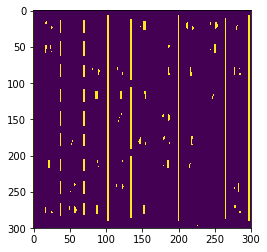

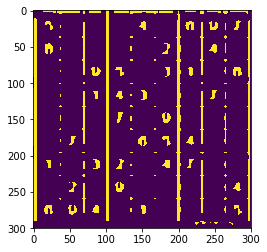

In [161]:
e1 = cv2.getTickCount()
kernel = np.ones((6,1),np.uint8)
erosion_no = cv2.erode(noises_red_no,kernel,iterations = 1)
erosion_with = cv2.erode(noises_red_with,kernel,iterations = 1)
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)
plt.figure()
plt.imshow(erosion_no)
plt.figure()
plt.imshow(erosion_with)


Draw vertical part of grid on mask

0.001999074


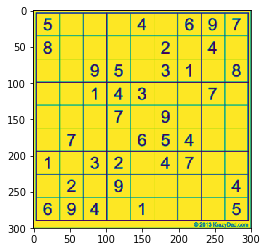

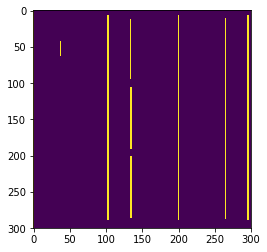

In [162]:
e1 = cv2.getTickCount()
ind, contours, hierarchy = cv2.findContours(erosion_no,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    if float(w)/h < 0.1:
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        #cv2.drawContours(mask,[box],0,(255,0,255),2)
        cv2.fillPoly(grid_mask, pts =[box], color=255)
        
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)
plt.figure()
plt.imshow(sudoku)
plt.figure()
plt.imshow(grid_mask)

Find horizontal part of grid

0.000902194


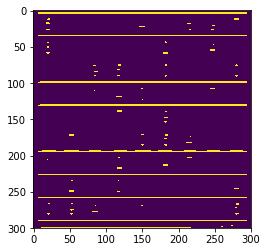

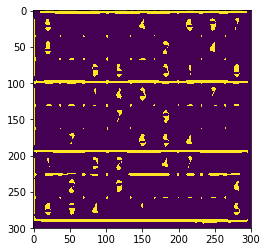

In [163]:
e1 = cv2.getTickCount()
kernel = np.ones((1,6),np.uint8)
erosion_no = cv2.erode(bin_image_no_blurr,kernel,iterations = 1)
erosion_with = cv2.erode(bin_image_with_blurr,kernel,iterations = 1)
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)
plt.figure()
plt.imshow(erosion_no)
plt.figure()
plt.imshow(erosion_with)


Draw horizontal part of grid od mask

0.001993728


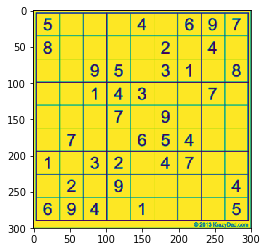

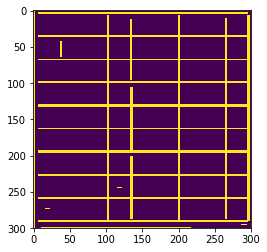

In [164]:
e1 = cv2.getTickCount()
ind, contours, hierarchy = cv2.findContours(erosion_no,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    if float(w)/h > 5:
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        #cv2.drawContours(sudoku,[box],0,(255,0,255),2)
        cv2.fillPoly(grid_mask, pts =[box], color=255)

kernel = np.ones((2,2),np.uint8)
grid_mask = cv2.dilate(grid_mask,kernel)

e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)
plt.figure()
plt.imshow(sudoku)
plt.figure()
plt.imshow(grid_mask)

Subtract masked grid from image

0.001381301


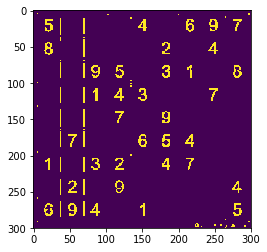

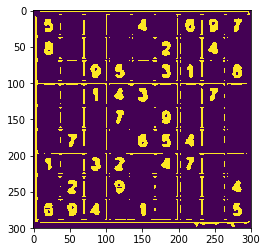

In [165]:
e1 = cv2.getTickCount()

kernel = np.ones((2,2),np.uint8)

erosion_no = cv2.erode(noises_red_no,kernel,iterations = 1)
erosion_with = cv2.erode(noises_red_with,kernel,iterations = 1)

with_mask_no = cv2.subtract(noises_red_no,grid_mask)
with_mask_with = cv2.subtract(noises_red_with,grid_mask)
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)
plt.figure()
plt.imshow(with_mask_no)
plt.figure()
plt.imshow(with_mask_with)

Get digits from sudoku

8 1 (50,267).jpg
0 7 (244,13).jpg
5 4 (147,178).jpg
2 2 (82,77).jpg
0 6 (212,19).jpg
4 5 (179,140).jpg
8 0 (15,266).jpg
5 4 (145,171).jpg
0 6 (210,12).jpg
0.108583064


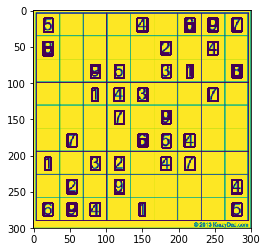

In [173]:
e1 = cv2.getTickCount()

def onMatrix(x, y, w, h):
    center = ((2*x+w)/2,(2*y+h)/2)
    cord = tuple((map(lambda x : int(x/30.5 + 0.4) - 1, center)))
    return tuple((map(lambda x : 0 if x < 0 else x , cord)))
    
    
sudoku_matrix = [[ 0 for x in range(0,9)] for x in range(0,9)]

ind, contours, hierarchy = cv2.findContours(with_mask_no,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea)
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    if float(w)/h > 0.3 and float(w)/h < 1.2 and w*h > 50:
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.rectangle(sudoku,(x-1,y-1),(x+w,y+h),(0,255,0),2)
        #center = ((2*x+w)/2,(2*y+h)/2)
        #i, j = tuple((map(lambda x : int(x/31 + 0.4) - 1, center)))
        i, j = onMatrix(x, y, w, h)
        #print(x, y, w, h)
        sudoku_matrix[j][i] = 0
        symbol = noises_red_no[y:y+h, x:x+h]
        symbol = cv2.resize(symbol, (30, 30)) 
        cord = "("+str(x)+","+str(y)+").jpg"
        path = "wyniki/"
        symbol = cv2.bitwise_not(symbol)
        cv2.imwrite(path+cord,symbol)
        result = model.predict(symbol)
        sudoku_matrix[j][i] = result 
        #plt.figure()
        #plt.imshow(symbol)
        
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(time)
plt.figure()
plt.imshow(sudoku)

In [174]:
def printSudoku(sudoku):
    for i, x in enumerate(sudoku):
        if i % 3 == 0:
            print("  - - - - - - - - - - - - - - - - - -    ")
        for j, y in enumerate(x):
            if j % 3 == 0:
                print(" | ", end="")
            print(y, end="")
        print(" | ")
    print("  - - - - - - - - - - - - - - - - - -    ")
        
printSudoku(sudoku_matrix)

  - - - - - - - - - - - - - - - - - -    
 | 500 | 040 | 697 | 
 | 800 | 002 | 040 | 
 | 009 | 503 | 108 | 
  - - - - - - - - - - - - - - - - - -    
 | 001 | 430 | 070 | 
 | 000 | 709 | 000 | 
 | 070 | 065 | 400 | 
  - - - - - - - - - - - - - - - - - -    
 | 103 | 204 | 700 | 
 | 020 | 900 | 004 | 
 | 694 | 010 | 005 | 
  - - - - - - - - - - - - - - - - - -    


In [176]:
import sys
from copy import deepcopy

def output(a):
    sys.stdout.write(str(a))

N = 9

# print(sudoku_matrix)

field = [[5,1,7,6,0,0,0,3,4],
         [2,8,9,0,0,4,0,0,0],
         [3,4,6,2,0,5,0,9,0],
         [6,0,2,0,0,0,0,1,0],
         [0,3,8,0,0,6,0,4,7],
         [0,0,0,0,0,0,0,0,0],
         [0,9,0,0,0,0,0,7,8],
         [7,0,3,4,0,0,5,6,0],
         [0,0,0,0,0,0,0,0,0]]

def print_field(field):
    if not field:
        output("No solution")
        return
    for i in range(N):
        for j in range(N):
            cell = field[i][j]
            if cell == 0 or isinstance(cell, set):
                output('.')
            else:
                output(cell)
            if (j + 1) % 3 == 0 and j < 8:
                output(' |')

            if j != 8:
                output(' ')
        output('\n')
        if (i + 1) % 3 == 0 and i < 8:
            output("- - - + - - - + - - -\n")

def read(field):
    """ Read field into state (replace 0 with set of possible values) """

    state = deepcopy(field)
    for i in range(N):
        for j in range(N):
            cell = state[i][j]
            if cell == 0:
                state[i][j] = set(range(1,10))

    return state

state = read(field)


def done(state):
    """ Are we done? """

    for row in state:
        for cell in row:
            if isinstance(cell, set):
                return False
    return True


def propagate_step(state):
    """ Propagate one step """

    new_units = False

    for i in range(N):
        row = state[i]
        values = set([x for x in row if not isinstance(x, set)])
        for j in range(N):
            if isinstance(state[i][j], set):
                state[i][j] -= values
                if len(state[i][j]) == 1:
                    state[i][j] = state[i][j].pop()
                    new_units = True
                elif len(state[i][j]) == 0:
                    return False, None

    for j in range(N):
        column = [state[x][j] for x in range(N)]
        values = set([x for x in column if not isinstance(x, set)])
        for i in range(N):
            if isinstance(state[i][j], set):
                state[i][j] -= values
                if len(state[i][j]) == 1:
                    state[i][j] = state[i][j].pop()
                    new_units = True
                elif len(state[i][j]) == 0:
                    return False, None

    for x in range(3):
        for y in range(3):
            values = set()
            for i in range(3*x, 3*x+3):
                for j in range(3*y, 3*y+3):
                    cell = state[i][j]
                    if not isinstance(cell, set):
                        values.add(cell)
            for i in range(3*x, 3*x+3):
                for j in range(3*y, 3*y+3):
                    if isinstance(state[i][j], set):
                        state[i][j] -= values
                        if len(state[i][j]) == 1:
                            state[i][j] = state[i][j].pop()
                            new_units = True
                        elif len(state[i][j]) == 0:
                            return False, None

    return True, new_units

def propagate(state):
    """ Propagate until we reach a fixpoint """
    while True:
        solvable, new_unit = propagate_step(state)
        if not solvable:
            return False
        if not new_unit:
            return True


def solve(state):
    """ Solve sudoku """

    solvable = propagate(state)

    if not solvable:
        return None

    if done(state):
        return state

    for i in range(N):
        for j in range(N):
            cell = state[i][j]
            if isinstance(cell, set):
                for value in cell:
                    new_state = deepcopy(state)
                    new_state[i][j] = value
                    solved = solve(new_state)
                    if solved is not None:
                        return solved
                return None

print_field(solve(read(sudoku_matrix)))

5 3 2 | 8 4 1 | 6 9 7
8 1 7 | 6 9 2 | 5 4 3
4 6 9 | 5 7 3 | 1 2 8
- - - + - - - + - - -
2 5 1 | 4 3 8 | 9 7 6
3 4 6 | 7 2 9 | 8 5 1
9 7 8 | 1 6 5 | 4 3 2
- - - + - - - + - - -
1 8 3 | 2 5 4 | 7 6 9
7 2 5 | 9 8 6 | 3 1 4
6 9 4 | 3 1 7 | 2 8 5
